## Training a Logistic Regression Model 

In [34]:
# imports
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib


In [30]:
# load the dataset
df=pd.read_csv('../data/cleaned_data.csv')
df.head()

,Title,Text,Subject,Date,Label,Year,Month
0,merkel juncker discuss catalan crisi eu offici,brussel reuter german chancellor angela merke...,worldnews,2017-10-07,0,2017.0,October
1,liber hack kati couric say fake news “tear ap...,kati couric wolf sheep cloth dan rather brian ...,left-news,2017-07-22,1,2017.0,July
2,trump right audit reveal state dept cybersecur...,new document appear show pattern deterior secu...,politics,2015-10-19,1,2015.0,October
3,clay aiken say ‘fg dumbass’ think trump wasn’...,former american idol finalist celebr appren...,News,2017-08-16,1,2017.0,August
4,us militia gird troubl presidenti elect near,jackson ga reuter georgia countri road camou...,politicsNews,2016-11-02,0,2016.0,November


In [31]:
# load vaders
df_vader=pd.read_csv('../data/vaders.csv')
df_vader.head()

,Title,neg,neu,pos,compound,Text,Subject,Date,Label,Year,Month,sentiment
0,merkel juncker discuss catalan crisi eu offici,0.024,0.940,0.036,-0.0000,brussel reuter german chancellor angela merke...,worldnews,2017-10-07,0,2017.0,October,neutral
1,liber hack kati couric say fake news “tear ap...,0.162,0.782,0.056,-0.9906,kati couric wolf sheep cloth dan rather brian ...,left-news,2017-07-22,1,2017.0,July,negative
2,liber hack kati couric say fake news “tear ap...,0.162,0.782,0.056,-0.9906,kati couric wolf sheep cloth dan rather brian ...,politics,2017-07-22,1,2017.0,July,negative
3,trump right audit reveal state dept cybersecur...,0.077,0.923,0.000,-0.7430,new document appear show pattern deterior secu...,politics,2015-10-19,1,2015.0,October,negative
4,trump right audit reveal state dept cybersecur...,0.077,0.923,0.000,-0.7430,new document appear show pattern deterior secu...,Government News,2015-10-19,1,2015.0,October,negative


In [32]:
df1=df_vader.__deepcopy__()

In [33]:
df1['content']=df1['Title'] + ' ' + df1['Text']
X = df1['content']
y = df1['Label']

In [35]:
# Converting text to numerical data using TF-IDF Vectorizer
# Handle missing values in X by filling NaN with an empty string
# This is important because TF-IDF cannot handle NaN values

X = X.fillna('')
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

Accuracy: 0.9893712239874692
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4235
           1       0.99      0.99      0.99      4703

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



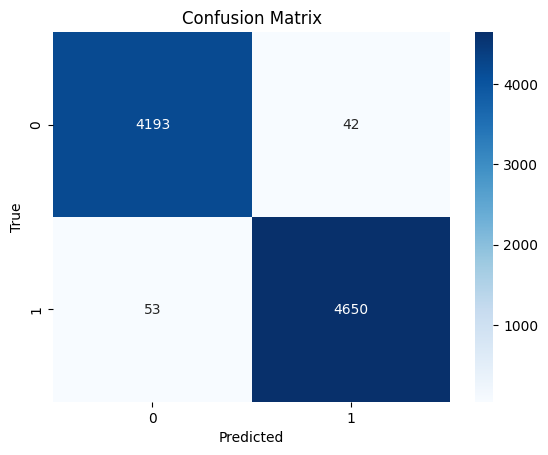

In [36]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('../Outputs/plots/confusion_matrix.png')
plt.show()


In [37]:
# save the model and vectorizer

joblib.dump(model, '../Outputs/models/logistic_regression_model.pkl')
joblib.dump(tfidf, '../Outputs/models/tfidf_vectorizer.pkl')

['../Outputs/models/tfidf_vectorizer.pkl']

## Conclusions
- The logistic regression model achieved an accuracy of 0.99 on the test set.
- The model performed well on both the training and test sets, indicating that it is not overfitting.